In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [65]:
#Set option to print float with 2 number after decimal point 
pd.options.display.float_format= "{:.2f}".format

In [66]:
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


Data has:
- 8 columns , 6435 rows.
- Each row shows the sales of Walmart in a week. 

In [67]:
df.duplicated().sum()

0

No duplicated row

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Data description:
- Store: The store number
- Date: The week of sales in USD
- Weekly_Sales: Sales for the given storeo 
- Holiday_Flag: Whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature: Temperature on the day of sale in Fahrenheit
- Fuel_Price: Cost of fuel in the region
- CPI :Prevailing consumer price index
- Unemployment: Prevailing unemployment rate

Further information provided by publisher:  
Holiday Events  
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [69]:
holiday_events = {
    'SuperBowl':['12-02-2010','11-02-2011','10-02-2012','08-02-2013'],
    'LabourDay':['10-09-2010','05-09-2011','07-09-2012','06-09-2013'],
    'Thanksgiving':['26-11-2010','25-11-2011','23-11-2012','29-11-2013'],
    'Christmas':['31-12-2010','30-12-2011','28-12-2012','27-12-2013']
    }

flatten_events = {val:key for key,lst in holiday_events.items() for val in lst}

In [70]:
df['Holiday_Event'] = df['Date'].map(flatten_events)

In [71]:
#Convert Date column to datetime type 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


Need to convert Date column to datetime type 

In [72]:
#Convert Temperature column from Fahrenheit to Celsius
df['Temperature'] = (df['Temperature'] - 32 ) * (5/9)

Convert temperature to Celsius for convinience.

In [73]:
#Add Month and Year column 
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [74]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,Month,Year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,NaN,2,2010
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,SuperBowl,2,2010
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,NaN,2,2010
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,NaN,2,2010
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,NaN,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,4.00,192.01,8.68,NaN,9,2012
6431,45,2012-10-05,733455.07,0,18.27,3.98,192.17,8.67,NaN,10,2012
6432,45,2012-10-12,734464.36,0,12.48,4.00,192.33,8.67,NaN,10,2012
6433,45,2012-10-19,718125.53,0,13.59,3.97,192.33,8.67,NaN,10,2012


In [75]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,15.92,3.36,171.58,8.00,6.45,2010.97
std,12.99,564366.62,0.26,10.25,0.46,39.36,1.88,3.24,0.80
min,1.00,209986.25,0.00,-18.92,2.47,126.06,3.88,1.00,2010.00
25%,12.00,553350.10,0.00,8.59,2.93,131.74,6.89,4.00,2010.00
50%,23.00,960746.04,0.00,17.04,3.44,182.62,7.87,6.00,2011.00
75%,34.00,1420158.66,0.00,23.86,3.73,212.74,8.62,9.00,2012.00
max,45.00,3818686.45,1.00,37.86,4.47,227.23,14.31,12.00,2012.00


In [76]:
df.isnull().sum()

Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Holiday_Event    6030
Month               0
Year                0
dtype: int64

No missing values. The data is fully collected.  
- Store: this data is conducted from store 1 to store 45 
- Weekly_Sales: the average weekly sales among the stores is 960746.04 $. The prime week can be up to nearly 4 Million $.
- Holiday_Flag: barely binary value. 
- Temperature: customer could also go out for a shopping even in minimal temperature of -2.06 Fahrenheit (approx -18 Celsius degree)
- Fuel_Price, ,CPI, Unemplyment: normal ratio 

$\rightarrow$ Nothing seems abnormal. 


In [77]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,Month,Year
0,1,2010-02-05,1643690.90,0,5.73,2.57,211.10,8.11,NaN,2,2010
1,1,2010-02-12,1641957.44,1,3.62,2.55,211.24,8.11,SuperBowl,2,2010
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11,NaN,2,2010
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11,NaN,2,2010
4,1,2010-03-05,1554806.68,0,8.06,2.62,211.35,8.11,NaN,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,4.00,192.01,8.68,NaN,9,2012
6431,45,2012-10-05,733455.07,0,18.27,3.98,192.17,8.67,NaN,10,2012
6432,45,2012-10-12,734464.36,0,12.48,4.00,192.33,8.67,NaN,10,2012
6433,45,2012-10-19,718125.53,0,13.59,3.97,192.33,8.67,NaN,10,2012


**QUESTION**: Walmart's Weekly Sales of Normal Days and Holidays ? What can be inferred from the trend ?   
This questions will give us an obseravtion on sales between special weeks and normal one. From that, we can infer some good hypothesis (i,e, how sales change, why the sales differ...).  
To answer this question:
- Create dataframe of normal day sales and holiday sales ( using Holiday_Flag to split)
- Group each by Date then find the total sales in each timestamp. 
- Plot the line to show the trends of two occasions. 


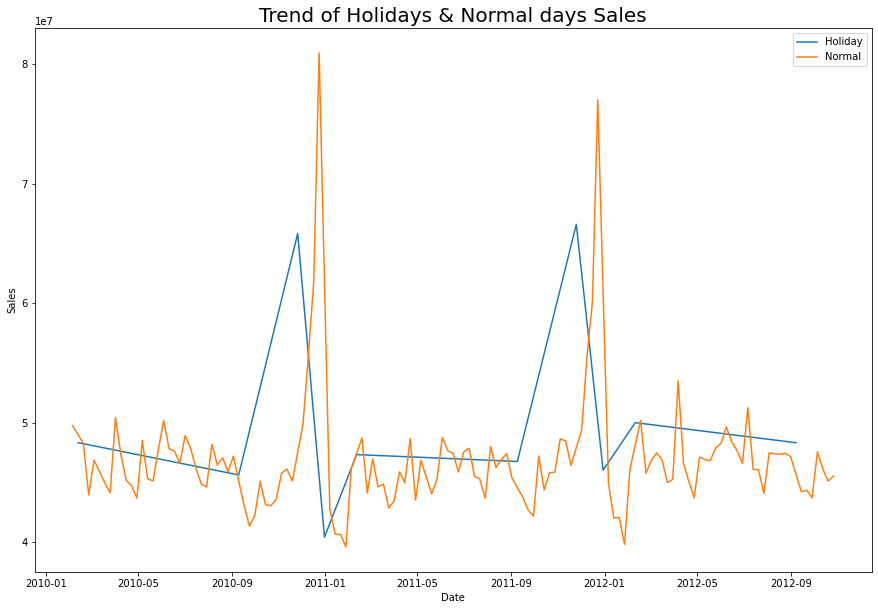

In [78]:
#Weekly Sales of normal days and holidays 

#Split sales of normal days and holidays
holiday_sales_df = df[df['Holiday_Flag'] == 1].sort_values(by='Date')
normal_sales_df = df[df['Holiday_Flag'] == 0].sort_values(by ='Date')

#Group each by Date with total sales
holiday_sales = holiday_sales_df.groupby('Date')['Weekly_Sales'].sum()
normal_sales = normal_sales_df.groupby('Date')['Weekly_Sales'].sum()

#Plot the trend 
plt.figure(figsize = (15,10))
plt.plot(holiday_sales)
plt.plot(normal_sales)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Trend of Holidays & Normal days Sales',size =20)
plt.legend(['Holiday','Normal'])
plt.show()

**ANALYZE**: Based on the outstanding points on the plot and properties of that timestamp.<br>

#### **On normal days**:   
- The weekly sales usually surge outstandingly in December, while drop significantly around the end of January or in October. <br>
#### **On Holidays**:  
- The Sales are especially high in November, which is Thansgiving Holiday. 
- It felt quite a large amount in Christmas.
- LabourDay sales remain steady over times.

$\rightarrow$ **We can draw out some hypothesis:**  
- People like to go shopping on Thanksgiving week. It occurs at the end of November, when the outside temperature is still acceptable, not too low. At this time, everyone tend celebrate more parties than other time in the year. Hence, the sales goes higher for this purpose.  
*Walmart should make their store with a lot of cargo, with a wide range of selection to maximize the sales.* 
- At Christmas, it often comes with New Year day off. The outside is colder than ever, the thick snow usually all over the road at this time. People find it harder to go to Walmart. It is reasonable for the lowest sales of all the holidays.  
*Walmart should not stock much on this date.* 
- There is an inclination that the sales after the Holiday week often drops comparing to the nearest Holiday. Consumers had bought enough goods on Holiday Week, or their budget got low after that.  
- It is noticeable that the week before Christmas, consumers rushed for a vast amount of goods. This cause the sales reached the peak. It can be explained that they went for a preparation before the snow could congest all the supplement during the Christmas.  
*There should be a huge goods complementary for this occasion.*
- When Spring comes, the normal condition get back , the sales would process gradually steady. *The supplement should work normally.* 

Text(0.5, 1.0, 'Distribution of Holiday Events Sales')

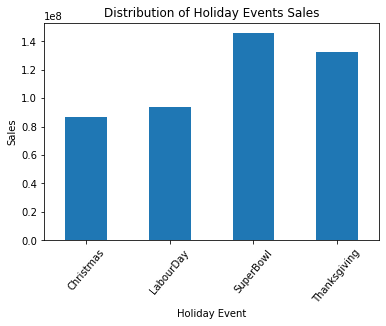

In [79]:
#Which holiday event has the highest sales
holiday_sales_dist = df.groupby('Holiday_Event')['Weekly_Sales'].sum()
fig= holiday_sales_dist.plot(kind='bar',rot=50)
plt.xlabel('Holiday Event')
plt.ylabel('Sales')
plt.title('Distribution of Holiday Events Sales')

**Question**: Impact of temperature, fuel price, cpi on the sales?  
This question will observe how factor affect the sales by month. This can lead to some business strategy (i,e, +/- stock, discount program,...) on specific time of the year.   
To answer this question: 
- Group the sales my Month, then find the mean of Temperature, Fuel_Price, CPI. The sales could be appended for simpler code as the observation could be relative. 
- Normalize the data to get a whole view on the visualization. 
- Co-plot the bar chart of sales and line chart of factors.


Text(0.5, 1.0, 'Sales and Factors Trend by Month')

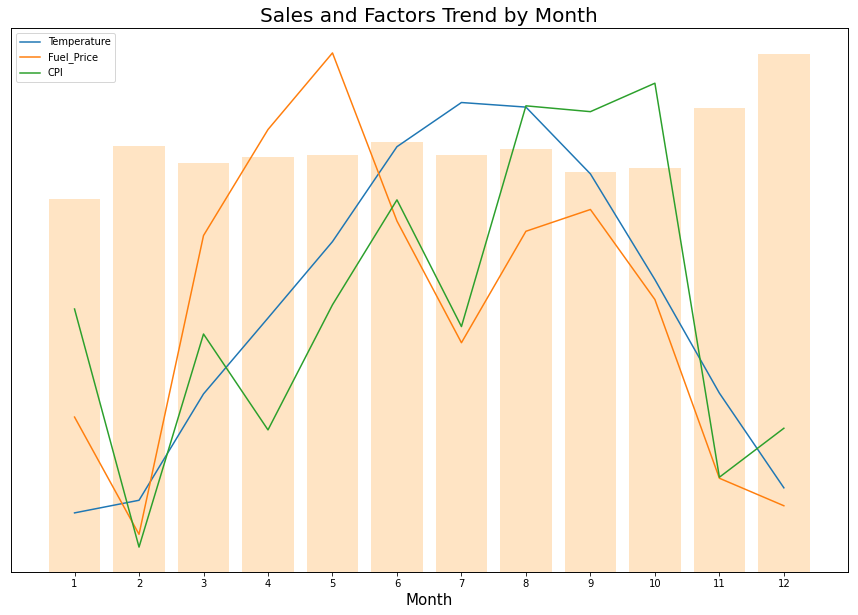

In [90]:
#Impact of temperature, fuel price, cpi on that holiday sales?

# Group the sales by Month. Sum the weekly sales
sales_factors_df = df.groupby(['Month'])[['Weekly_Sales','Temperature','Fuel_Price','CPI']].mean()
sales_factors = sales_factors_df[['Temperature','Fuel_Price','CPI']]
sales_factors = (sales_factors - sales_factors.mean())/sales_factors.std() + 1e6

#Co-plot
fig,ax1 = plt.subplots(figsize=(15,10))

ax1.bar(sales_factors_df.index,sales_factors_df['Weekly_Sales'],color='bisque')
ax2 = ax1.twinx()
    
ax2.plot(sales_factors)
ax2.legend(['Temperature','Fuel_Price','CPI'],loc = 2)

#Configure the plot
ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_xticks(sales_factors.index)
ax1.set_xlabel("Month",size= 15)
plt.title('Sales and Factors Trend by Month',size= 20)

**ANALYZE**: Based on significant change in sales and factors in each month.  

In general: 
